### **Regularization in Machine Learning (L1 & L2)**
Regularization helps prevent **overfitting** by adding a penalty to the loss function. It is especially useful for models like **Linear Regression, Logistic Regression, and Neural Networks**.

---

## **Types of Regularization**
1. **L1 Regularization (Lasso - Least Absolute Shrinkage and Selection Operator)**
   - Adds **absolute values** of coefficients as a penalty term.
   - Shrinks some coefficients to **zero**, effectively performing **feature selection**.
   - Formula:
     \[
     Loss = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_i|
     \]
   
2. **L2 Regularization (Ridge Regression)**
   - Adds **squared values** of coefficients as a penalty term.
   - Shrinks coefficients **towards zero** but never makes them exactly zero.
   - Formula:
     \[
     Loss = \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_i^2
     \]

3. **Elastic Net Regularization (Combination of L1 and L2)**
   - Combines **L1 (Lasso) and L2 (Ridge)** penalties.
   - Helps when features are **highly correlated**.
   - Formula:
     \[
     Loss = \sum (y_i - \hat{y}_i)^2 + \lambda_1 \sum |w_i| + \lambda_2 \sum w_i^2
     \]

---

## **Regularization in Models**

### **1. Linear Regression with L1 (Lasso) and L2 (Ridge)**
```python
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 (Lasso) Regularization
lasso = Lasso(alpha=0.1)  # α (lambda) controls the penalty strength
lasso.fit(X_train, y_train)

# L2 (Ridge) Regularization
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print(f"Lasso Coefficients: {lasso.coef_}")
print(f"Ridge Coefficients: {ridge.coef_}")
```
✅ **Lasso** shrinks some coefficients to **zero** (feature selection).  
✅ **Ridge** shrinks coefficients but **does not eliminate** them.

---

### **2. Logistic Regression with L1 and L2 Regularization**
```python
from sklearn.linear_model import LogisticRegression

# L1 Regularization (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
log_reg_l1.fit(X_train, y_train)

# L2 Regularization (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
log_reg_l2.fit(X_train, y_train)

print(f"L1 Regularized Model Score: {log_reg_l1.score(X_test, y_test)}")
print(f"L2 Regularized Model Score: {log_reg_l2.score(X_test, y_test)}")
```
✅ **L1 (Lasso) Logistic Regression** can remove **irrelevant features**.  
✅ **L2 (Ridge) Logistic Regression** is useful for **handling multicollinearity**.

---

### **3. Elastic Net Regularization**
```python
from sklearn.linear_model import ElasticNet

# Elastic Net (Combination of L1 & L2)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio: 0 (Ridge) → 1 (Lasso)
elastic_net.fit(X_train, y_train)

print(f"Elastic Net Coefficients: {elastic_net.coef_}")
```
✅ Elastic Net is useful when features are **highly correlated**.

---

## **Regularization in Random Forest?**
- **Random Forest does not use L1/L2 regularization** because it already reduces overfitting using:
  - **Bootstrap aggregation (Bagging)**
  - **Feature randomness (Selecting random subsets of features for each tree)**

🔹 However, you can control **overfitting in Random Forest** using:
  - `max_depth`: Limit the depth of trees.
  - `min_samples_split`: Minimum samples required to split a node.
  - `min_samples_leaf`: Minimum samples in a leaf node.

Example:
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)
```

---

## **When to Use L1, L2, or Elastic Net?**
| **Regularization** | **Effect** | **Use Case** |
|-----------------|------------------|--------------------|
| **L1 (Lasso)** | Shrinks and removes features | Feature selection, sparse data |
| **L2 (Ridge)** | Shrinks coefficients (not zero) | Multicollinearity, generalization |
| **Elastic Net** | Mix of L1 and L2 | Correlated features, structured sparsity |

Would you like code for tuning **alpha (λ) values** automatically? 🚀

### **Hyperparameter Tuning for L1, L2, and Elastic Net Regularization**  

We will use **cross-validation** to find the best values of **alpha (λ)** for Lasso, Ridge, and Elastic Net.

---

### **1. Tuning L1 (Lasso) and L2 (Ridge) Regularization**
```python
from sklearn.linear_model import LassoCV, RidgeCV
import numpy as np

# Define a range of alpha values to search
alphas = np.logspace(-3, 2, 50)  # 50 values between 0.001 and 100

# Lasso (L1) CV
lasso_cv = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)
print(f"Best Alpha for Lasso: {lasso_cv.alpha_}")

# Ridge (L2) CV
ridge_cv = RidgeCV(alphas=alphas).fit(X_train, y_train)
print(f"Best Alpha for Ridge: {ridge_cv.alpha_}")
```
✅ **Automatically selects the best α (lambda) for L1 and L2**  
✅ **Uses cross-validation (cv=5) to find the optimal regularization strength**

---

### **2. Tuning Elastic Net (L1 + L2) Regularization**
```python
from sklearn.linear_model import ElasticNetCV

# Define a range of alpha values and L1 ratios
alphas = np.logspace(-3, 2, 50)
l1_ratios = np.linspace(0.1, 1, 10)  # Mix of L1 and L2

# Elastic Net CV
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5).fit(X_train, y_train)
print(f"Best Alpha for Elastic Net: {elastic_net_cv.alpha_}")
print(f"Best L1 Ratio for Elastic Net: {elastic_net_cv.l1_ratio_}")
```
✅ **Finds the best mix of L1 and L2 penalties**  
✅ **Automatically selects the best alpha (λ) and L1 ratio**  

---

### **3. Plotting the Effect of Alpha on Coefficients (Lasso & Ridge)**
```python
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Lasso Path
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Lasso", color="blue")
plt.axvline(lasso_cv.alpha_, linestyle="--", color="blue", label=f"Lasso Best α: {lasso_cv.alpha_:.4f}")

# Ridge Path
plt.plot(ridge_cv.alphas_, ridge_cv.mse_path_.mean(axis=1), label="Ridge", color="red")
plt.axvline(ridge_cv.alpha_, linestyle="--", color="red", label=f"Ridge Best α: {ridge_cv.alpha_:.4f}")

# Formatting
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Regularization Path for Lasso and Ridge")
plt.legend()
plt.show()

```
✅ **Shows how regularization strength affects model coefficients**  
✅ **Lasso eliminates some coefficients (feature selection)**  
✅ **Ridge shrinks all coefficients without making them zero**  

---

## **🚀 Key Takeaways**
1. **L1 (Lasso) Regularization**: Use `LassoCV` for automatic tuning.
2. **L2 (Ridge) Regularization**: Use `RidgeCV` for best α selection.
3. **Elastic Net**: Use `ElasticNetCV` to balance L1 & L2 regularization.
4. **Cross-validation** helps avoid overfitting while tuning regularization.

Would you like a **comparison of model performance** before and after regularization? 🔍

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
#EDA
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()  #df[df.duplicated()]

1

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


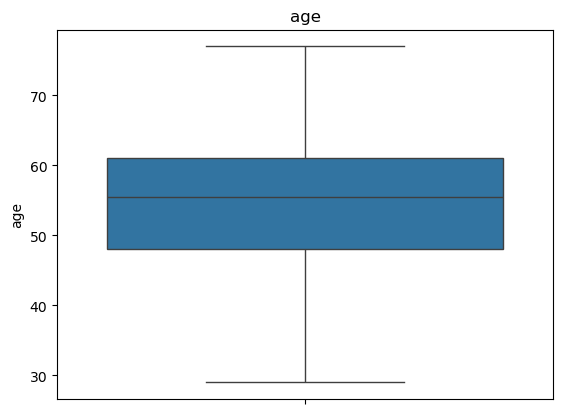

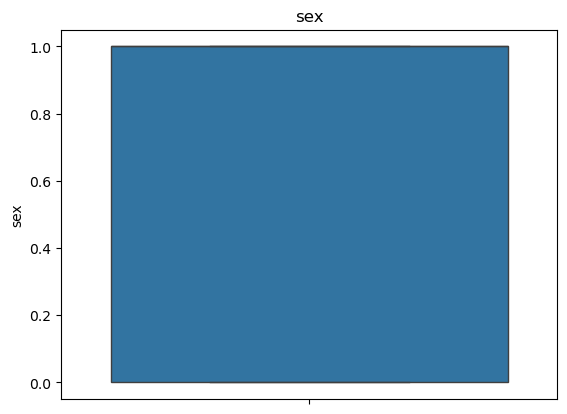

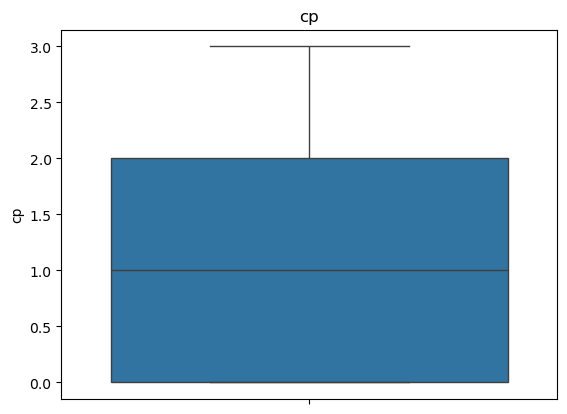

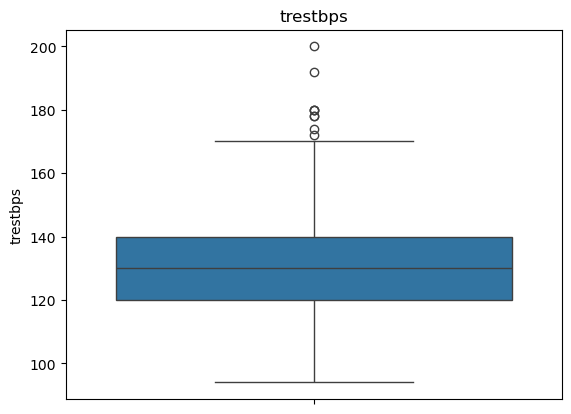

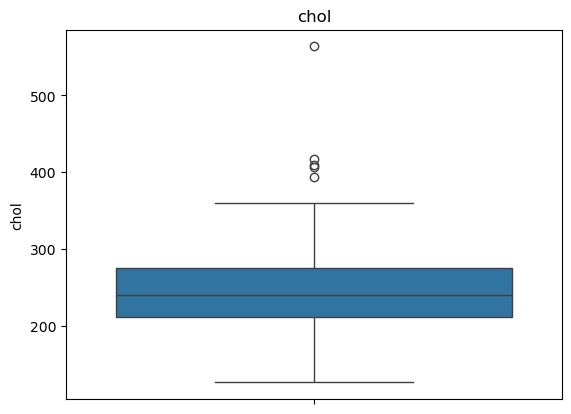

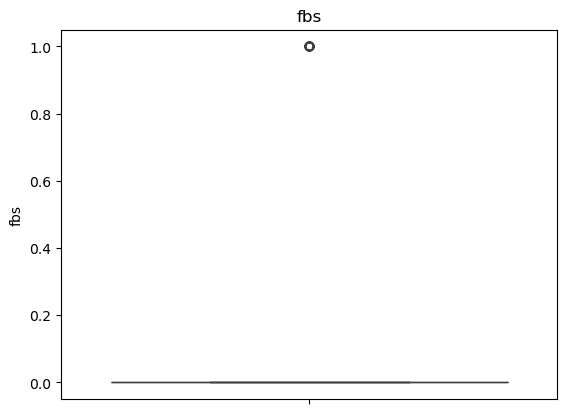

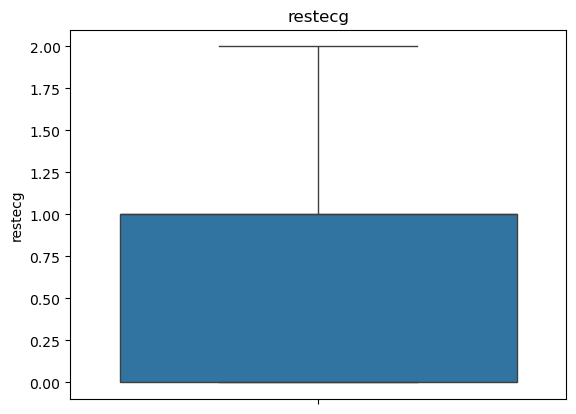

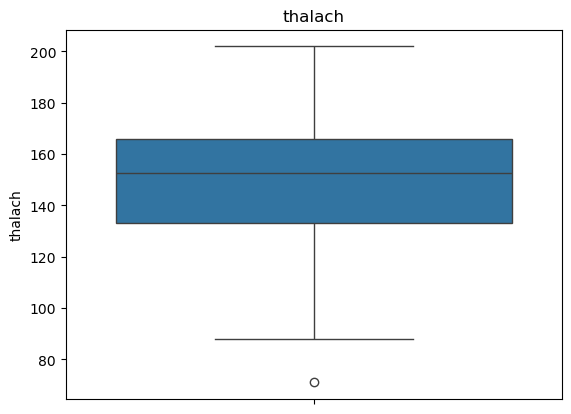

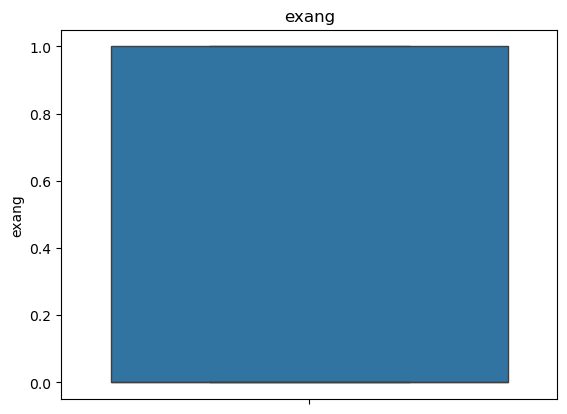

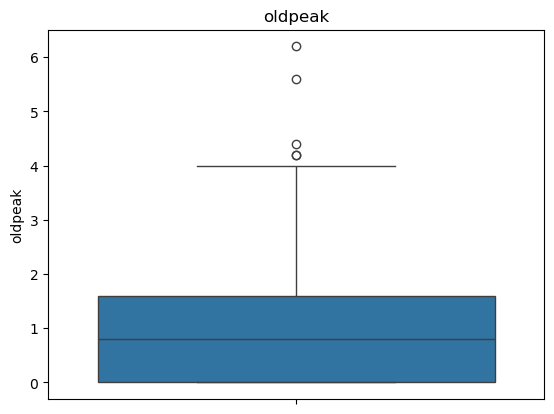

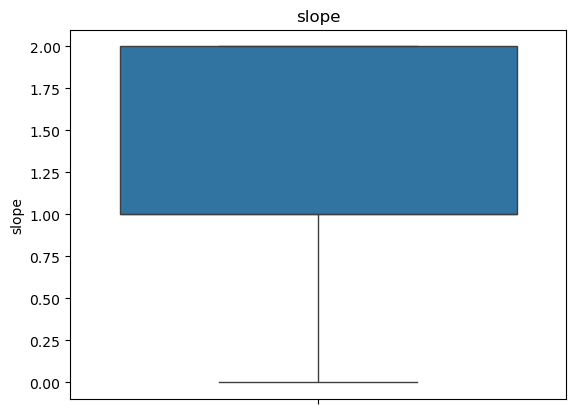

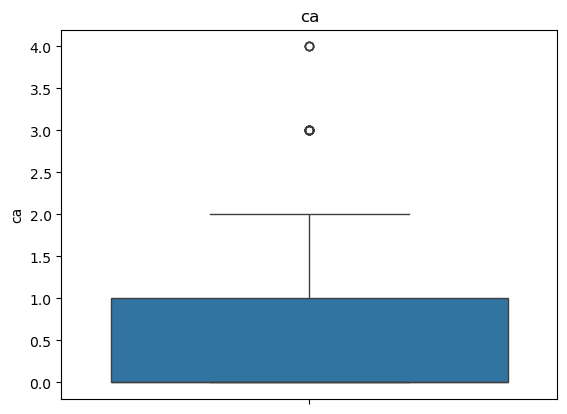

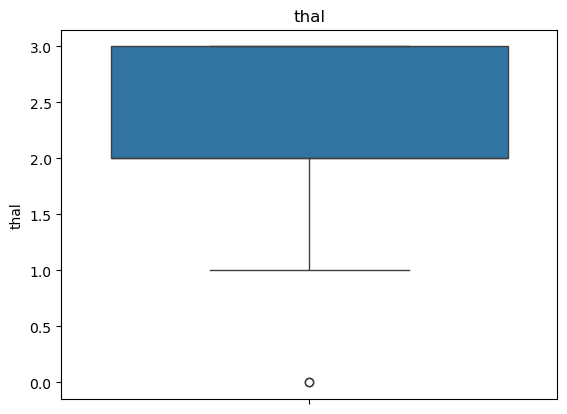

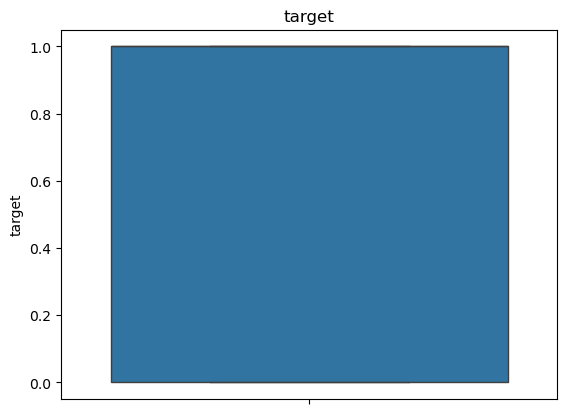

In [9]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [10]:
#split the data
X = df.drop("target", axis =1)
y =df["target"]

In [13]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

In [29]:
# L1 Lasso

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = LogisticRegression(penalty = "l1",solver = 'liblinear', C=1.0)
# lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)


accuracy_lasso = accuracy_score(y_test,y_pred_lasso)
accuracy_lasso

0.8360655737704918

In [30]:
lasso_features_weights = pd.DataFrame(
    {'feature': df.drop("target", axis =1).columns, 'weight':lasso.coef_.flatten()}
)
print(lasso_features_weights.sort_values(by ="weight",ascending = False))

     feature    weight
10     slope  0.719625
2         cp  0.651086
6    restecg  0.437972
5        fbs  0.050755
7    thalach  0.033414
0        age  0.018844
4       chol -0.003091
3   trestbps -0.020953
9    oldpeak -0.433111
11        ca -0.767941
8      exang -0.781659
12      thal -0.949775
1        sex -1.410021


In [35]:
# l2 Ridge (we are doing a classification problem
ridge = RidgeClassifier(alpha =1.0)  #alpha --lambda
#ridge = Ridge(alpha=0.1) for linear
ridge.fit(X_train, y_train)

y_test_pred_ridge = ridge.predict(X_test)
ridge_accuracy = accuracy_score(y_test,y_test_pred_ridge)
ridge_accuracy

0.8360655737704918

In [32]:
ridge_weights = pd.DataFrame(
    {'Feature':df.drop("target", axis =1).columns, "weight": ridge.coef_.flatten()}
)
print(ridge_weights.sort_values(by="weight", ascending = False))

     Feature    weight
10     slope  0.222287
2         cp  0.167934
5        fbs  0.153840
6    restecg  0.110225
7    thalach  0.006145
0        age  0.001437
4       chol -0.000755
3   trestbps -0.006062
9    oldpeak -0.095018
11        ca -0.222687
12      thal -0.287434
8      exang -0.322531
1        sex -0.414370


In [53]:
from sklearn.linear_model import LassoCV, RidgeCV
import numpy as np

# Define a range of alpha values to search
alphas = np.logspace(-3, 2, 50)  # 50 values between 0.001 and 100

# Lasso (L1) CV for linear
# lasso_cv = LassoCV(alphas=alphas, cv=5).fit(X_train, y_train)
# print(f"Best Alpha for Lasso: {lasso_cv.alpha_}")

# Ridge (L2) CV for linear
ridge_cv = RidgeCV(alphas=alphas).fit(X_train, y_train)
print(f"Best Alpha for Ridge: {ridge_cv.alpha_}")

from sklearn.linear_model import RidgeClassifierCV

# Define Ridge Classifier with built-in Cross-Validation
ridge_clf = RidgeClassifierCV(alphas=alphas, cv=5)  # Alpha values to test
ridge_clf.fit(X_train, y_train)

print(f"Best Alpha for RidgeClassifier: {ridge_clf.alpha_}")

Best Alpha for Ridge: 12.067926406393289
Best Alpha for RidgeClassifier: 1.8420699693267164


In [54]:
# using tuned alpha (ridge)
ridge = RidgeClassifier(alpha =ridge_cv.alpha_)  #alpha --lambda
#ridge = Ridge(alpha=0.1) for linear
ridge.fit(X_train, y_train)

y_test_pred_ridge = ridge.predict(X_test)
ridge_accuracy = accuracy_score(y_test,y_test_pred_ridge)
ridge_accuracy

0.8524590163934426

In [56]:
# using tuned alpha ridgeClassifier
ridge = RidgeClassifier(alpha =ridge_clf.alpha_)  #alpha --lambda
#ridge = Ridge(alpha=0.1) for linear
ridge.fit(X_train, y_train)

y_test_pred_ridge = ridge.predict(X_test)
ridge_accuracy = accuracy_score(y_test,y_test_pred_ridge)
ridge_accuracy

0.8360655737704918

The difference in accuracy between **`RidgeCV`** (used for regression) and **`RidgeClassifierCV`** (used for classification) comes from the way they handle optimization and decision boundaries. Here’s why you might be getting better accuracy with `RidgeCV`:

---

### **1. Different Optimization Objectives**
- **`RidgeCV` (Regression + α Regularization)**  
  - Solves a **least squares regression problem** with **L2 regularization**.  
  - It finds the **best fit line** and minimizes **Mean Squared Error (MSE)**.  
  - It can work well for classification when labels are numerical (0 & 1) and decision boundary is linear.
  
- **`RidgeClassifierCV` (Classification + α Regularization)**  
  - Works like **Logistic Regression**, but instead of minimizing log loss, it uses **least squares loss**.  
  - Finds a **linear decision boundary** for separating classes.  
  - Uses **argmax** to assign class labels, which may lead to different classification results than using a probability-based approach.

---

### **2. How `RidgeCV` Might Give Higher Accuracy**
If you used **`RidgeCV` for classification**, you likely did this:
```python
ridge_reg = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Convert to class labels
```
- `RidgeCV` outputs **continuous predictions** (regression values), and you **manually threshold** them at 0.5.
- This may **align better with the decision boundary** compared to `RidgeClassifierCV`, which **directly classifies** based on the Ridge objective.

---

### **3. When to Use Which?**
| Method               | Use Case | Regularization |
|----------------------|----------|----------------|
| `RidgeCV` + Thresholding | When labels are 0/1 and the problem is nearly linear | L2 (α tuning) |
| `RidgeClassifierCV` | When you want direct classification with cross-validation for `alpha` | L2 (α tuning) |

---

### **4. What Should You Do?**
- If **RidgeCV gives higher accuracy**, and your problem is **binary classification**, you can keep using it with a **thresholding approach**.
- If you need **multi-class classification**, `RidgeClassifierCV` is more appropriate.
- For **better performance**, try **Logistic Regression with L2 (Ridge) or L1 (Lasso)**.

Would you like a **comparison between Ridge Classifier and Logistic Regression?** 🚀

In [45]:
# since we are doing classification, we need to use logisticregressionCV

# Logistic Regression with Lasso (L1) and Cross-Validation
logreg_lasso_cv = LogisticRegressionCV(
    penalty='l1', 
    solver='liblinear',  # liblinear supports L1 regularization
    Cs=10,  # 10 values of C will be tested
    cv=5,  # 5-fold cross-validation
    random_state=42
)
logreg_lasso_cv.fit(X_train, y_train)

# Best Regularization Strength (C)
print(f"Best C value: {logreg_lasso_cv.C_[0]}")

Best C value: 2.782559402207126


In [47]:
# L1 with tuned C
lasso = LogisticRegression(penalty = "l1",solver = 'liblinear', C=logreg_lasso_cv.C_[0])
# lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)


accuracy_lasso = accuracy_score(y_test,y_pred_lasso)
accuracy_lasso

0.8360655737704918

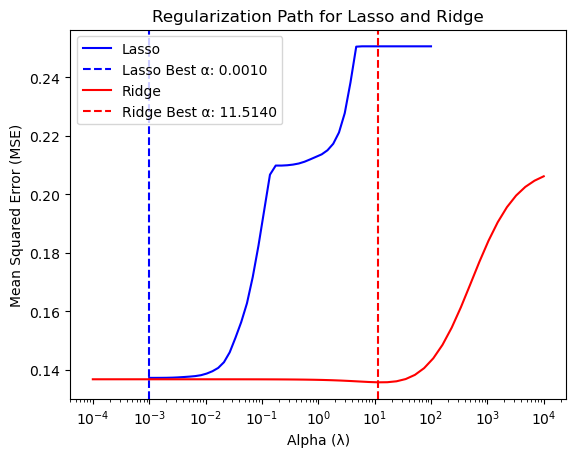

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

# Define alphas for RidgeCV
alphas = np.logspace(-4, 4, 50)

# Perform RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # Ensure store_cv_values is True
ridge_cv.fit(X_train, y_train)

# Ridge MSE values (Mean Squared Errors)
ridge_mse = np.mean(ridge_cv.cv_values_, axis=0)  # Compute mean MSE across folds

# Lasso Path
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Lasso", color="blue")
plt.axvline(lasso_cv.alpha_, linestyle="--", color="blue", label=f"Lasso Best α: {lasso_cv.alpha_:.4f}")

# Ridge Path (Now properly computed)
plt.plot(alphas, ridge_mse, label="Ridge", color="red")
plt.axvline(ridge_cv.alpha_, linestyle="--", color="red", label=f"Ridge Best α: {ridge_cv.alpha_:.4f}")

# Formatting
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Regularization Path for Lasso and Ridge")
plt.legend()
plt.show()


Your regularization path visualization for Lasso and Ridge looks great! Here’s what we can infer from the plot:

### **Analysis of the Regularization Path**
1. **Lasso Regularization (Blue Curve)**
   - The MSE initially stays low for small alpha values.
   - As alpha increases, the error rises sharply, indicating strong feature selection.
   - The best alpha for Lasso is **0.001**, which suggests minimal regularization.

2. **Ridge Regularization (Red Curve)**
   - The error remains almost constant for small alpha values.
   - At higher alphas, the error starts increasing, meaning too much shrinkage.
   - The best alpha for Ridge is **11.514**, suggesting moderate reguother variation? 🚀